In [1]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import chi2_contingency
# # import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
import ModelFunctions



C:\Users\nining\AppData\Local\Temp\ipykernel_868\2370302928.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

data = pd.read_csv("data_pre_process.csv")

Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
    ModelFunctions.split_data(data, "FSO_Att",drop_column = ["Frequency",'RFL_Att']) # Frequency doesn't relate to FSO_Att

Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
    ModelFunctions.split_data(data, "RFL_Att",drop_column = ['FSO_Att'])


#######  FSO_Att Data Set  ######
FSO_Att Training set feature count: (63965, 24)
FSO_Att Validation set feature count: (13707, 24)
FSO_Att Training set label count: (63965,)
FSO_Att Validation set label count: (13707,)
#######  RFL_Att Data Set  ######
RFL_Att Training set feature count: (63965, 25)
RFL_Att Validation set feature count: (13707, 25)
RFL_Att Training set label count: (63965,)
RFL_Att Validation set label count: (13707,)


# Estimators tunning for FSO
Based on single Decision Tree Analysis 
"max_depth":[18],'min_samples_leaf':[9],'min_samples_split':[3] is the optimized hyperparameter in a tree, 
and based on above parameter to tunning random forest n_estimator

# FSO coarse tuning

In [3]:
# file is two parts, which need to pd.concat 
parameters = {
    'n_estimators': [*range(60,301,10)],
    'max_depth': [*range(15,31,5)],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [3]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = 4)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_FSO")

# df1 = pd.read_csv("results_202402222107_n_estimators-100-300-11_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RFFSO.csv")
# df2 = pd.read_csv("results_202402232258_n_estimators-60-80-2_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RF_fso_compensate.csv")

KeyboardInterrupt: 

In [ ]:
parameters = {
    'n_estimators': [*range(10,301,20)],
    'max_depth': [*range(5,31,5)],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = -1)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_FSO")

10
20
30
40
50
60
70
80
90
train Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 290}
train Best score: 0.09488361855515186
valid Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 290}
valid Best score: 0.6903744783415041
Results saved to results_202403261925_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_FSO.csv


'results_202403261925_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_FSO.csv'

# FSO fine tuning

In [ ]:
parameters = {
    'n_estimators': [*range(120,150,10)],
    'max_depth': [*range(27,33,1)],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = 4)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_FSO")
# df1 = pd.read_csv("results_202402230144_n_estimators-120-140-3_max_depth-27-32-6_min_samples_leaf-2-5-4_min_samples_split-2-3-2_RFFSO.csv")
# df2 = pd.read_csv('results_202402240942_n_estimators-120-140-3_max_depth-28-32-3_min_samples_leaf-1-1-1_min_samples_split-2-3-2_RF_FSO_compensate.csv')


train Best parameters: None
train Best score: inf
valid Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
valid Best score: 0.6939928895942131
Results saved to results_202402240942_n_estimators-120-140-3_max_depth-28-32-3_min_samples_leaf-1-1-1_min_samples_split-2-3-2_RF_FSO_compensate.csv


'results_202402240942_n_estimators-120-140-3_max_depth-28-32-3_min_samples_leaf-1-1-1_min_samples_split-2-3-2_RF_FSO_compensate.pkl'

# Estimators tunning for RFL
Based on single Decision Tree Analysis 
"max_depth":[20],'min_samples_leaf':[6],'min_samples_split':[3] is the most optimized parameters, and based on above parameters to operate RFL tunning 

In [ ]:

parameters = {
    'n_estimators': [*range(60,301,20)],
    'max_depth': [15,20,25,30],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [3]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 4)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_RFL")

# df1 = pd.read_csv("results_202402231350_n_estimators-100-300-11_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RF_RFL.csv")
# df2 = pd.read_csv("results_202402232230_n_estimators-60-80-2_max_depth-15-30-4_min_samples_leaf-4-7-4_min_samples_split-3-3-1_RF_rfl_compensate.csv")

train Best parameters: {'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 300}
train Best score: 0.1096422937562162
valid Best parameters: {'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 100}
valid Best score: 0.3192357673956129


In [ ]:
parameters = {
    'n_estimators': [*range(10,301,20)],
    'max_depth': [*range(5,31,5)],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = -1)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_RFL")

10
20
30
40
50
60
70
80
90
train Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 290}
train Best score: 0.03825791664749852
valid Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
valid Best score: 0.28006488236075255
Results saved to results_202403270057_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_RFL.csv


'results_202403270057_n_estimators-10-290-15_max_depth-5-30-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_RFL.csv'

# RFL fine tunning
based on the coarse tunning, n_estimator = 100, max-depth = 25， min_leaf_sample=4 min_split_number= 3 

In [ ]:
parameters = {
    'n_estimators': [*range(100,141,10)],
    'max_depth': [23,24,25,26,27,28],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,3]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 4)
ModelFunctions.save_model_results(results, parameters, file_model="_RF", file_att="_RFL")

train Best parameters: {'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
train Best score: 0.03925189332479551
valid Best parameters: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
valid Best score: 0.2800648823607526


# RF model best performance 

In [ ]:
parameters = {
    'n_estimators': [130],
    'max_depth': [30],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = 4)
print("*********fso_val***************")
print(results)
print("************************")
parameters = {
    'n_estimators': [130],
    'max_depth': [30],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xtest_fso, 
                            Ytest_fso,
                            n_jobs = 4)
print("*********fso_test***************")
print(results)
print("************************")

parameters = {
    'n_estimators': [110],
    'max_depth': [28],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 4)
print("*********rfl_val***************")
print(results)
print("************************")

parameters = {
    'n_estimators': [110],
    'max_depth': [28],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xtest_rfl, 
                            Ytest_rfl,
                            n_jobs = 4)
print("*********rfl_test***************")
print(results)
print("************************")



train Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
train Best score: 0.09743382906320416
valid Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
valid Best score: 0.6940498602039414
*********fso_val***************
[{'params': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}, 'train_mse': 0.09743382906320416, 'train_r2': 0.9936547708800652, 'val_mse': 0.6940498602039414, 'val_r2': 0.9538645838220653}]
************************
train Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
train Best score: 0.09743382906320416
valid Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}
valid Best score: 0.6072213241085717
*********fso_test***************
[{'params': {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 130}

In [ ]:
print(np.sqrt([0.097,0.69,0.61,0.039,0.29,0.25]))

[0.31144823 0.83066239 0.78102497 0.19748418 0.53851648 0.5       ]


Evaluate the feature importance of fso rf model

In [ ]:
fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )
# fso_rf_rmse = cross_val_score(fso_rf_model,Xtrain_fso,Ytrain_fso,cv = 2,scoring = "neg_mean_squared_error",n_jobs=-1)
# print('fso training set rmse:', np.sqrt(-fso_rf_rmse).mean())
# fso_rf_r2 = cross_val_score(fso_rf_model,Xtrain_fso,Ytrain_fso,cv = 2,scoring = "r2",n_jobs=-1)
# print('fso training set r2:', fso_rf_r2.mean())


Feature Importance: [0.02271067 0.00813117 0.00717366 0.34519937 0.02945277 0.02617726
 0.07396507 0.00169338 0.00152786 0.00147664 0.02449223 0.00214374
 0.08982336 0.01950955 0.02779869 0.03797571 0.01951771 0.13806395
 0.05139865 0.04930978 0.00247159 0.00502051 0.01017551 0.00479119]


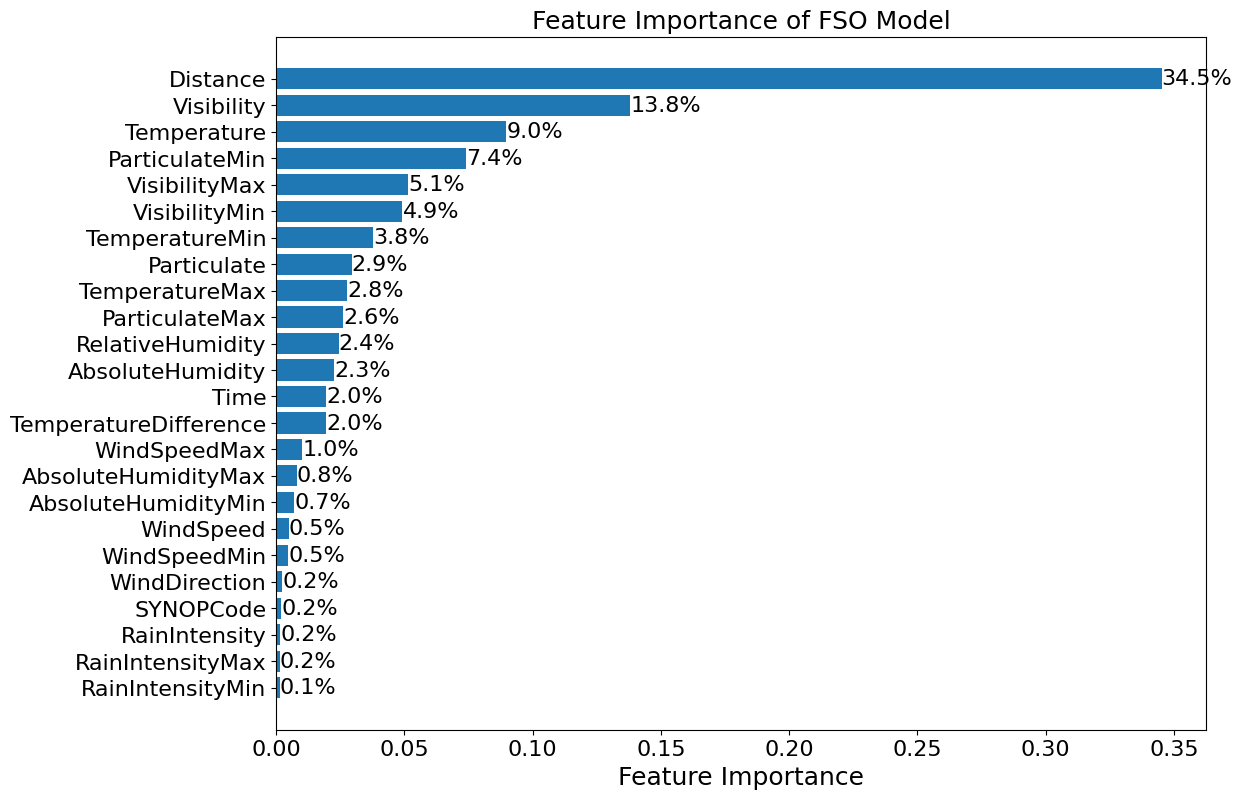

In [ ]:
fso_rf_model.fit(Xtrain_fso, Ytrain_fso)

sorted_features_fso,sorted_importance_fso = \
    ModelFunctions.sort_features(fso_rf_model,Xtrain_fso,channel = "FSO",figure = False)

feature_importance = fso_rf_model.feature_importances_

print("Feature Importance:", feature_importance)

plt.figure(figsize=(12, 9))
bars = plt.barh(sorted_features_fso, sorted_importance_fso)
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')

plt.xlabel('Feature Importance',fontsize=18)
#plt.ylabel('Features',fontsize=18)
plt.title('Feature Importance of FSO Model',fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.show()

In [ ]:
# # calculate SHAP 
# explainer = shap.TreeExplainer(fso_rf_model)
# shap_values = explainer.shap_values(Xtrain_fso)

# # SHAP visualization
# shap.summary_plot(shap_values, Xtrain_fso, feature_names=Xtrain_fso.columns)

Evaluate the feature importance of rfl rf model

In [ ]:
rfl_rf_model = RandomForestRegressor(n_estimators = 110, max_depth=28, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split = 2  )
# rfl_rf_rmse = cross_val_score(rfl_rf_model,Xtrain_rfl,Ytrain_rfl,cv = 2,scoring = "neg_mean_squared_error",n_jobs=-1)
# print('rfl training set rmse:', np.sqrt(-rfl_rf_rmse).mean())
# rfl_rf_r2 = cross_val_score(rfl_rf_model,Xtrain_rfl,Ytrain_rfl,cv = 2,scoring = "r2",n_jobs=-1)
# print('rfl training set r2:', rfl_rf_r2.mean())

Feature Importance: [0.20392269 0.00836114 0.00608916 0.20791753 0.0114239  0.00277842
 0.01651278 0.00705984 0.23551333 0.08941104 0.05356089 0.01473164
 0.02789504 0.05927209 0.00690615 0.00829586 0.00633503 0.0064267
 0.00955863 0.00527468 0.00702779 0.0010928  0.00105337 0.00262974
 0.00094977]


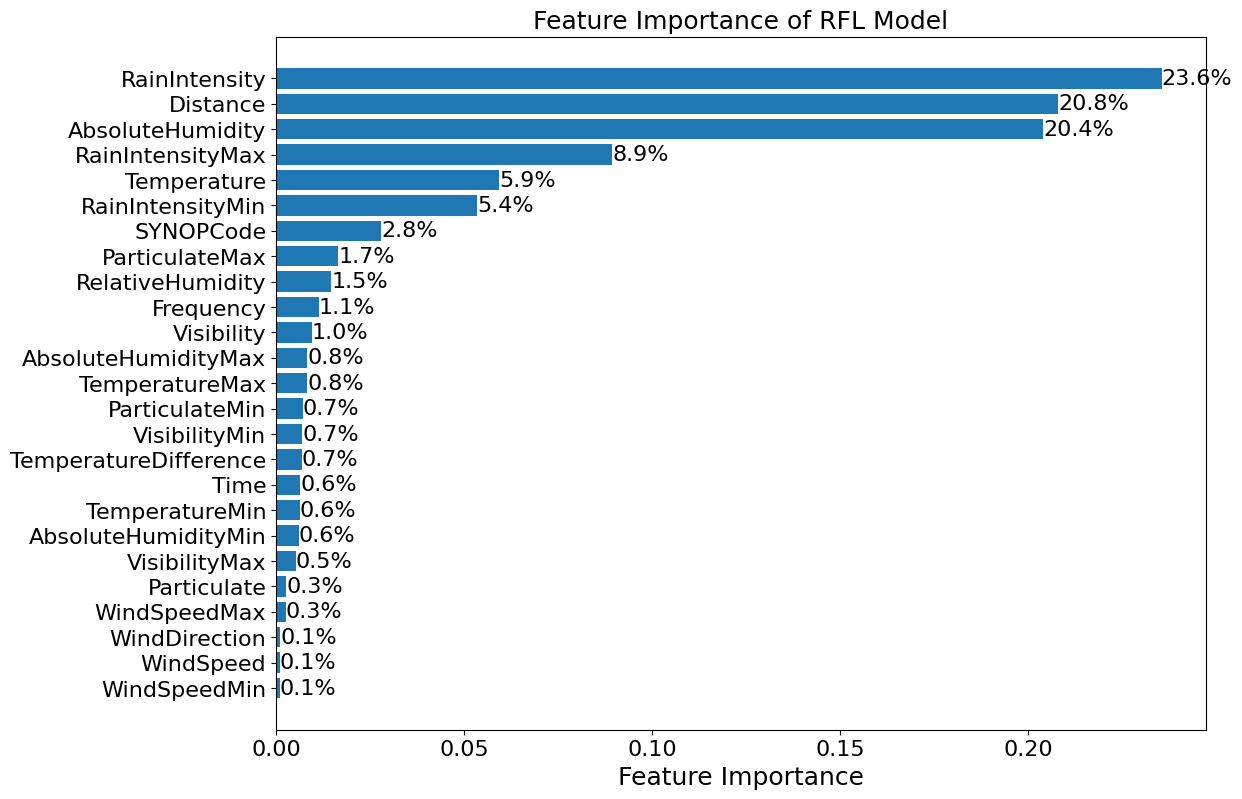

In [ ]:
rfl_rf_model.fit(Xtrain_rfl, Ytrain_rfl)
feature_importance = rfl_rf_model.feature_importances_
print("Feature Importance:", feature_importance)

sorted_features_rfl,sorted_importance_rfl = \
    ModelFunctions.sort_features(rfl_rf_model,Xtrain_rfl,channel = "FSO",figure = False)


plt.figure(figsize=(12, 9))
bars = plt.barh(sorted_features_rfl, sorted_importance_rfl)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')

plt.xlabel('Feature Importance',fontsize=18)
#plt.ylabel('Features',fontsize=18)
plt.title('Feature Importance of RFL Model',fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.show()

The wrapper method using out of bag information to determine the selection of feature 

In [ ]:
fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )

performance_scores = ModelFunctions.wrapper_method (fso_rf_model,Xtrain_fso,Ytrain_fso,Xval_fso,Yval_fso,channel = "FSO")

important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "FSO_130-30-1-2_feature_importance_wrapple.csv"
df.to_csv(file_name, index=False)  



In [ ]:
rfl_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=25, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split = 2, oob_score=True,n_jobs=6  )
performance_scores = ModelFunctions.wrapper_method (rfl_rf_model,Xtrain_rfl,Ytrain_rfl,Xval_rfl,Yval_rfl,channel = "RFL")

important_columns = ["remove_feature", "train_rmse", "train_r2","val_rmse","val_r2", "oob_r2","next_remove","importance_score"]
df = pd.DataFrame(performance_scores, columns=important_columns)
file_name = "rfl_130-25-1-2_feature_importance_wrapple.csv"
df.to_csv(file_name, index=False)  

In [ ]:
# data['AbsoluteHumidityRange'] = data['AbsoluteHumidityMax']-data['AbsoluteHumidityMin']
# data['ParticulateRange'] = data['ParticulateMax'] - data['ParticulateMin']
# data['RainIntensityRange'] = data['RainIntensityMax'] - data['RainIntensityMin']
# data['TemperatureRange'] = data['TemperatureMax'] - data['TemperatureMin']
# data['VisibilityRange'] = data['VisibilityMax'] - data['VisibilityMin']
# data['WindSpeedRange'] = data['WindSpeedMax'] - data['WindSpeedMin']



# results_202402271050_n_estimators-120-150-4_max_depth-27-33-4_min_samples_leaf-1-2-2_min_samples_split-2-3-2_RF_FSO.csv

# Rebuilt model

## FSO coarse

In [14]:
df = pd.read_csv("FSO_130-30-1-2_feature_importance_wrapple.csv")
fso_columns = df['remove_feature'][:-14] # 
fso_columns = list(fso_columns)
print(fso_columns)
fso_columns.remove("All Features")
fso_columns
Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
    ModelFunctions.split_data(data, "FSO_Att",drop_column = fso_columns + ["Frequency",'RFL_Att'],\
                              test_size=0.3, valtest_available = 1, random_state=42) # Frequency doesn't relate to FSO_Att

# # Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
# #     ModelFunctions.split_data(data, "RFL_Att",drop_column = fso_columns['FSO_Att'],\
# #                               test_size=0.15, valtest_available = 0, random_state=42)

['All Features', 'RainIntensityMin', 'RainIntensityMax', 'SYNOPCode', 'WindDirection', 'RainIntensity', 'WindSpeedMin', 'AbsoluteHumidityMin', 'WindSpeed', 'AbsoluteHumidityMax', 'WindSpeedMax']
#######  FSO_Att Data Set  ######
FSO_Att Training set feature count: (63965, 14)
FSO_Att Validation set feature count: (13707, 14)
FSO_Att Training set label count: (63965,)
FSO_Att Validation set label count: (13707,)


In [15]:
Xtrain_fso

,AbsoluteHumidity,Distance,Particulate,ParticulateMax,ParticulateMin,RelativeHumidity,Temperature,TemperatureDifference,TemperatureMax,TemperatureMin,Time,Visibility,VisibilityMax,VisibilityMin
12119,10.800826,2963.960736,0.000000,0.000000,0.000000,75.738274,16.763823,-1.190,16.845045,16.613398,10,67505.808610,70527.860680,61606.112421
12395,14.585821,2964.964776,0.000000,0.000000,0.000000,74.622513,22.123704,-1.990,24.255075,20.766346,7,53231.967860,55563.784678,52056.684872
45768,4.661195,2014.818821,0.000000,0.000000,0.000000,32.884149,16.663018,0.240,18.320478,15.376948,15,35226.083860,36228.885033,32264.634650
43767,2.883420,2013.471197,0.000000,0.000000,0.000000,41.135449,5.469308,-1.102,5.830478,5.385382,10,63981.973940,68267.392710,61530.321944
79697,3.822507,4825.649500,0.000000,0.000000,0.000000,72.687749,1.180987,0.700,1.260801,1.092603,9,39824.569980,40857.335522,38236.186375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,15.467066,2960.768457,0.000000,0.000000,0.000000,52.310778,29.516714,0.910,31.477086,29.036805,2,74997.759710,78282.882184,70551.885703
54886,6.296259,4823.058526,275.651288,290.255181,261.794027,85.162056,6.281649,0.000,6.480963,5.726989,0,10685.736800,11712.322544,10524.999644
76820,5.191509,4827.591078,0.000000,0.000000,0.000000,77.558322,4.770788,-0.200,5.160011,4.548442,16,39705.084160,39905.398746,39219.997292
860,18.543531,2117.152077,0.000000,0.000000,0.000000,69.118681,27.742336,-0.570,29.820485,27.451621,9,32538.147320,33309.100931,30100.854911


In [16]:
parameters = {
    'n_estimators': [*range(50,191,20)],
    'max_depth': [*range(10,51,10)],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = 6)
file_name_results = ModelFunctions.save_model_results(results, parameters, file_model="_RF_rebuilt_80%", file_att="_FSO")

10
20
30
40
train Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}
train Best score: 0.09468752985215341
valid Best parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}
valid Best score: 0.7114274928254579
Results saved to results_202404060946_n_estimators-50-190-8_max_depth-10-50-5_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_80%_FSO.csv


## fso fine tuning

In [18]:
parameters = {
    'n_estimators': [*range(130,161,10)],
    'max_depth': [26,28,30,32,34],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xval_fso, 
                            Yval_fso,
                            n_jobs = 6)
file_name_results = ModelFunctions.save_model_results(results, parameters, file_model="_RF_rebuilt", file_att="_FSO")

10
20
train Best parameters: {'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
train Best score: 0.0956068667889248
valid Best parameters: {'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 160}
valid Best score: 0.712393651302967
Results saved to results_202404061021_n_estimators-130-160-4_max_depth-26-34-5_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_FSO.csv


In [11]:
df = pd.read_csv("results_202404060017_n_estimators-90-140-6_max_depth-26-34-5_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_FSO.csv")
#print(df)

min_train_mse_row = df[df['train_mse'] == df['train_mse'].min()]
print("train_mse best:")
print(min_train_mse_row)

min_valid_mse_row = df[df['val_mse'] == df['val_mse'].min()]
print("valid_mse best:")
print(min_valid_mse_row)

# select_esti = df[(df['min_samples_leaf'] == 1) & (df['min_samples_split'] == 2)]

# ModelFunctions.plot_fine_tuning(select_esti, channel = 'FSO', lis=[27,29,33], group_column='max_depth', Xaxis='n_estimators',\
#                             metrics='RMSE', metrics1='R_square',markersize = 10,\
#                             legend_loc="upper right",legend_loc1="lower right")



train_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
29           140         34                 1                  2   0.125199   

    train_r2   val_mse    val_r2  
29  0.991816  0.854738  0.943031  
valid_mse best:
    n_estimators  max_depth  min_samples_leaf  min_samples_split  train_mse  \
17           140         30                 1                  2   0.126758   

    train_r2   val_mse    val_r2  
17  0.991714  0.854707  0.943033  


## fso refine model testset

In [24]:
parameters = {
    'n_estimators': [150],
    'max_depth': [34],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_fso, 
                            Ytrain_fso, 
                            Xtest_fso, 
                            Ytest_fso,
                            n_jobs = 6)

train Best parameters: {'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
train Best score: 0.09561640175011586
valid Best parameters: {'max_depth': 34, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
valid Best score: 0.610359714344405


In [25]:
results

[{'params': {'max_depth': 34,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 150},
  'train_mse': 0.09561640175011586,
  'train_r2': 0.993773128054583,
  'val_mse': 0.610359714344405,
  'val_r2': 0.9590039362763491}]

## RFL coarse

In [22]:
df = pd.read_csv("rfl_130-25-1-2_feature_importance_wrapple.csv")
fso_columns = df['remove_feature'][:-11] # 
fso_columns = list(fso_columns)
print(fso_columns)
fso_columns.remove("All Features")
fso_columns
# Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
#     ModelFunctions.split_data(data, "FSO_Att",drop_column = fso_columns + ["Frequency",'RFL_Att'],\
#                               test_size=0.2, valtest_available = 0, random_state=42) # Frequency doesn't relate to FSO_Att

Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
    ModelFunctions.split_data(data, "RFL_Att",drop_column = fso_columns+['FSO_Att'],\
                              test_size=0.3, valtest_available = 1, random_state=42)

['All Features', 'WindSpeed', 'WindDirection', 'WindSpeedMin', 'Particulate', 'WindSpeedMax', 'VisibilityMax', 'AbsoluteHumidityMin', 'TemperatureMin', 'Time', 'ParticulateMin', 'TemperatureDifference', 'AbsoluteHumidityMax', 'VisibilityMin', 'TemperatureMax']
#######  RFL_Att Data Set  ######
RFL_Att Training set feature count: (63965, 11)
RFL_Att Validation set feature count: (13707, 11)
RFL_Att Training set label count: (63965,)
RFL_Att Validation set label count: (13707,)


In [23]:
parameters = {
    'n_estimators': [*range(50,191,20)],
    'max_depth': [*range(10,41,10)],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 6)
file_name_results = ModelFunctions.save_model_results(results, parameters, file_model="_RF_rebuilt", file_att="_RFL")

10
20
30
train Best parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}
train Best score: 0.04637443949792741
valid Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 190}
valid Best score: 0.3402461496364542
Results saved to results_202404061037_n_estimators-50-190-8_max_depth-10-40-4_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_RFL.csv


## rfl fine tune

In [27]:
parameters = {
    'n_estimators': [*range(90,151,10)],
    'max_depth': [22,24,26,28,30,32],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 6)
file_name_results = ModelFunctions.save_model_results(results, parameters, file_model="_RF_rebuilt", file_att="_RFL")

10
20
30
40
train Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 140}
train Best score: 0.04672122658331337
valid Best parameters: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
valid Best score: 0.3392363828122588
Results saved to results_202404061108_n_estimators-90-150-7_max_depth-22-32-6_min_samples_leaf-1-1-1_min_samples_split-2-2-1_RF_rebuilt_RFL.csv


# RFL rebuilt model test set

In [28]:
parameters = {
    'n_estimators': [120],
    'max_depth': [32],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xval_rfl, 
                            Yval_rfl,
                            n_jobs = 6)
results
#file_name_results = ModelFunctions.save_model_results(results, parameters, file_model="_RF_rebuilt", file_att="_RFL")

train Best parameters: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
train Best score: 0.04743180858035056
valid Best parameters: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
valid Best score: 0.3394691279422851


[{'params': {'max_depth': 32,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 120},
  'train_mse': 0.04743180858035056,
  'train_r2': 0.9960023102051272,
  'val_mse': 0.3394691279422851,
  'val_r2': 0.9710817501644902}]

In [29]:
parameters = {
    'n_estimators': [120],
    'max_depth': [32],
    'min_samples_leaf': [1],
    'min_samples_split': [2]
}

results = ModelFunctions.rf_evaluate_parameter_grid(parameters, 
                            Xtrain_rfl, 
                            Ytrain_rfl, 
                            Xtest_rfl, 
                            Ytest_rfl,
                            n_jobs = 6)
results

train Best parameters: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
train Best score: 0.04743180858035055
valid Best parameters: {'max_depth': 32, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
valid Best score: 0.2918407126414482


[{'params': {'max_depth': 32,
   'min_samples_leaf': 1,
   'min_samples_split': 2,
   'n_estimators': 120},
  'train_mse': 0.04743180858035055,
  'train_r2': 0.9960023102051272,
  'val_mse': 0.2918407126414482,
  'val_r2': 0.9751187579872642}]